# Fitting simple models on data

## TOC
* [python arrays (`numpy`)](#numpy)
* [visualizing data and models (`matplotlib`)](#matplotlib)
* [fitting a simple (linear) model on data](#fit)
* [computing integrals](#integrals)
* [integrating ordinary differential equations](#ode)

<a id="fit"></a>
## Fitting a simple, linear model on data

In [1]:
# let's create some data and present it corresponds to a series of measurements of some linear law
x = np.random.uniform(-3., 10., size=100)
y = 2. * x + 1.1

# we should add noise
yerr = np.random.uniform(0.2, 1., size=100)
# yerr = 0.5 * np.ones(100)
n = np.random.normal(scale=yerr, size=100)
y += n

Text(0,0.5,'y')

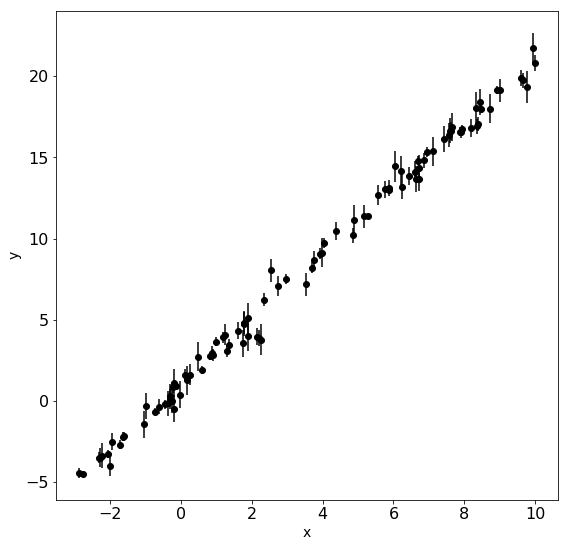

In [325]:
pl.figure(figsize=(9,9))
pl.errorbar(x, y, yerr=yerr, ls='', marker='o', color='k')
pl.xlabel('x', fontsize=14)
pl.ylabel('y', fontsize=14)

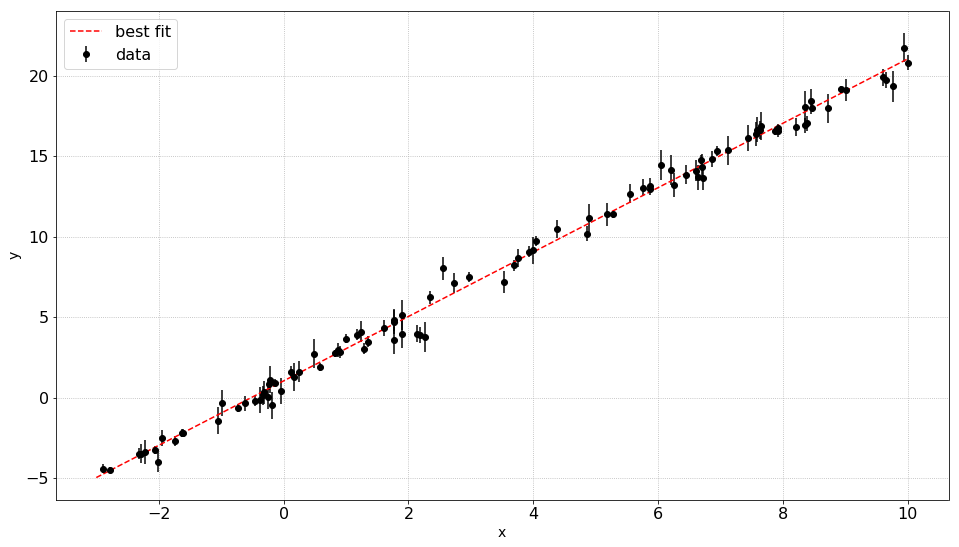

In [328]:
# Now, let's model it with a linear law
r = np.polyfit(x,y, deg=1)

# it is always better to add some weights
w = 1. / yerr**2
r = np.polyfit(x, y, deg=1, w=w)

pl.figure(figsize=(16,9))
xx = np.linspace(-3., 10., 100)
pl.errorbar(x, y, yerr=yerr, ls='', marker='o', color='k', label='data')
pl.plot(xx, np.polyval(r, xx), 'r--', label='best fit')
pl.xlabel('x', fontsize=14)
pl.ylabel('y', fontsize=14)
pl.legend(loc='upper left')
pl.grid(1, ls=':')

Text(0.5,0,'residuals')

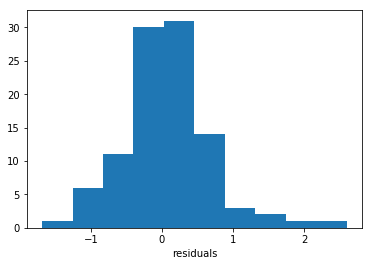

In [246]:
# we can have a look at the residuals
residuals = y - np.polyval(r, x)
pl.figure()
pl.hist(residuals, bins=10)
pl.xlabel('residuals')

Chi2=115.844795  Reduced Chi2=1.182090


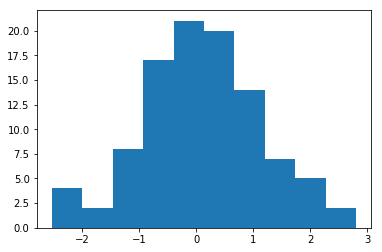

In [247]:
# the pulls
pl.hist(residuals / yerr, bins=10)
chi2 = ((residuals / yerr)**2).sum()
ndof = len(residuals) - 2
reduced_chi2 = chi2 / ndof
print("Chi2=%f  Reduced Chi2=%f" % (chi2, reduced_chi2))

In [248]:
import scipy.optimize as optimize

def f(p, x):
    return p[0] * x + p[1]

def errfunc(p,x, y, err):
    return (f(p,x) - y) / err

p0 = np.zeros(2)
p0[0], p[1] = 0.1, 0.1

p, success = optimize.leastsq(errfunc, p0, args=(x,y,yerr))
print p, success

[2.00354656 0.99934123] 1


Text(0,0.5,'y')

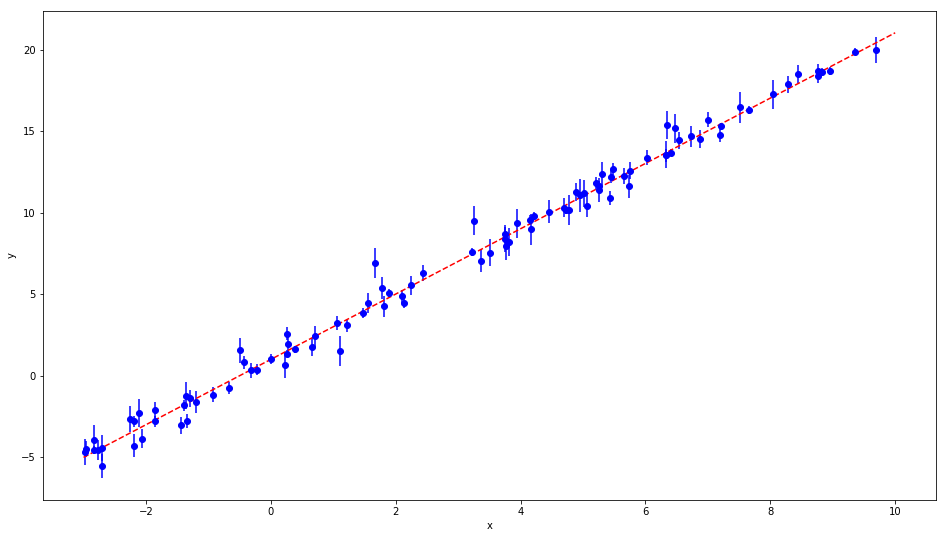

In [249]:
pl.figure(figsize=(16,9))
pl.errorbar(x, y, yerr=yerr, ls='', marker='o', color='b')
pl.plot(xx, f(p,xx), 'r--')
pl.xlabel('x')
pl.ylabel('y')

Chi2=115.844795 Reduced chi2=1.182090


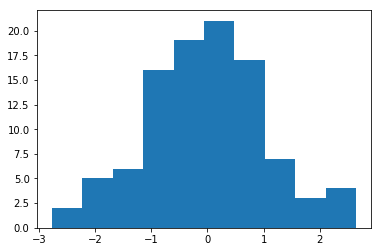

In [250]:
pulls = errfunc(p,x,y,yerr)
pl.hist(pulls, bins=10)
Chi2 = pulls.sum()
ndof = len(x) - 2
print('Chi2=%f Reduced chi2=%f' % (chi2, chi2/ndof))

In [251]:
J = np.array([x, np.ones(len(x))]).T
W = np.diag(1. / yerr**2)
A = np.dot(J.T, W).dot(J)
B = np.dot(J.T, W).dot(y)
print J.shape, A.shape, B.shape, type(W)
p = linalg.solve(A, B)

(100, 2) (2, 2) (2,) <type 'numpy.ndarray'>


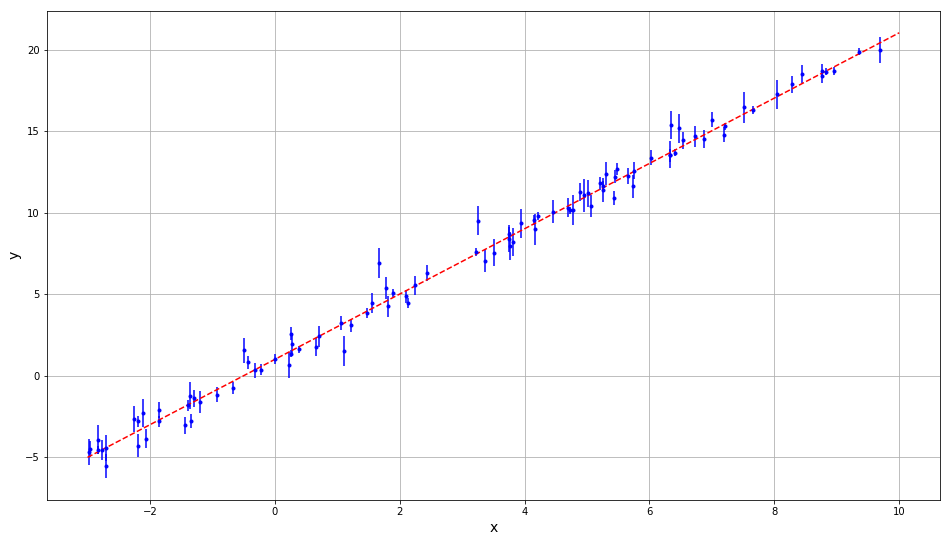

In [252]:
pl.figure(figsize=(16,9))
pl.errorbar(x, y, yerr=yerr, ls='', color='b', marker='.')
pl.xlabel('x', fontsize=14)
pl.ylabel('y', fontsize=14)
pl.plot(xx, p[0] * xx + p[1], 'r--')
pl.grid(1)

Chi2=115.077194 Reduced chi2=1.174257


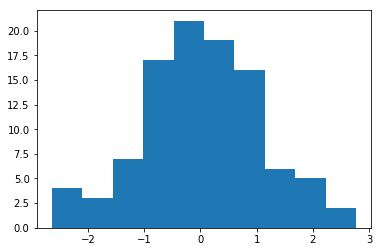

In [253]:
residuals = y - p[0] * x - p[1]
pulls = residuals / yerr
chi2 = (pulls**2).sum()
ndof = len(x) - 2
pl.figure()
pl.hist(pulls, bins=10)
print('Chi2=%f Reduced chi2=%f' % (chi2, chi2/ndof))